 # UNAD 

 ## Hector Julio Hernandez Marin

 ### prediccion del Valor de Vehiculos

## Pasos de la Actividad

#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

#### 4. Dividir el dataset en Train y Test para evaluar correctamente el 3 modelo. 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

#### 8. Otros Análisis de datos multivariables

#### 9. Interpretar, analizar y documentar los resultados obtenidos.

####  Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/




# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [9]:
# Importar librerías estándar
import numpy as np  # Biblioteca NumPy para operaciones numéricas y arreglos
import pandas as pd  # Biblioteca Pandas para manipulación y análisis de datos

# Importar funciones de scikit-learn
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.model_selection import train_test_split  # Función para dividir el conjunto de datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de evaluación del modelo

# Importar librerías de visualización
import matplotlib.pyplot as plt  # Biblioteca Matplotlib para crear gráficos y visualizaciones de datos

In [10]:

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('car details v4.csv')

# Mostrar las primeras filas del DataFrame
df.head()  # Esto mostrará las primeras 5 filas del DataFrame

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [11]:
df.info()  # Muestra un resumen del DataFrame, incluyendo el número de entradas, el tipo de datos de cada columna, y el uso de memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

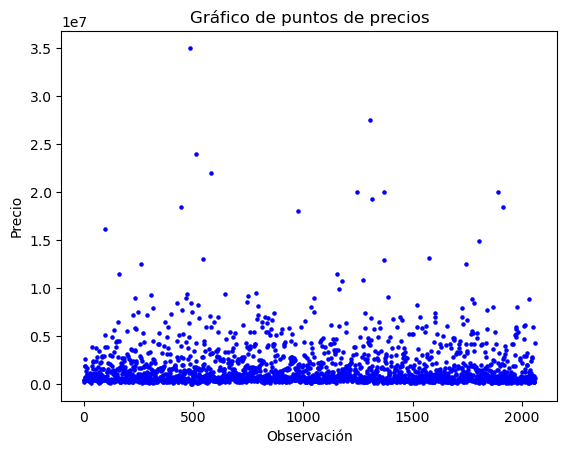

In [12]:
# Crear el gráfico de dispersión
plt.scatter(range(df.shape[0]), df['Price'], s=5, color='blue')

# Etiquetas de los ejes
plt.xlabel('Observación')  # Eje X
plt.ylabel('Precio')  # Eje Y
plt.title('Gráfico de puntos de precios')  # Título del gráfico

# Mostrar el gráfico
plt.show()

In [203]:

# Calcular la media y la desviación estándar de la columna 'Price'
media = df['Price'].mean()
desviacion = df['Price'].std()

# Calcular el rango superior e inferior usando 1.96 veces la desviación estándar
Rsuperior = media + desviacion * 1.96
Rinferior = media - desviacion * 1.96

# Crear una copia del DataFrame original para trabajar con ella
copydf = df.copy()

# Eliminar valores atípicos: aquellos que están por encima del límite superior
copydf = copydf.drop(copydf[copydf['Price'] > Rsuperior].index)

# Eliminar valores atípicos: aquellos que están por debajo del límite inferior
copydf = copydf.drop(copydf[copydf['Price'] < Rinferior].index)

# Mostrar el DataFrame sin los valores atípicos
copydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1979 non-null   object 
 1   Model               1979 non-null   object 
 2   Price               1979 non-null   int64  
 3   Year                1979 non-null   int64  
 4   Kilometer           1979 non-null   int64  
 5   Fuel Type           1979 non-null   object 
 6   Transmission        1979 non-null   object 
 7   Location            1979 non-null   object 
 8   Color               1979 non-null   object 
 9   Owner               1979 non-null   object 
 10  Seller Type         1979 non-null   object 
 11  Engine              1900 non-null   object 
 12  Max Power           1900 non-null   object 
 13  Max Torque          1900 non-null   object 
 14  Drivetrain          1844 non-null   object 
 15  Length              1916 non-null   float64
 16  Width      

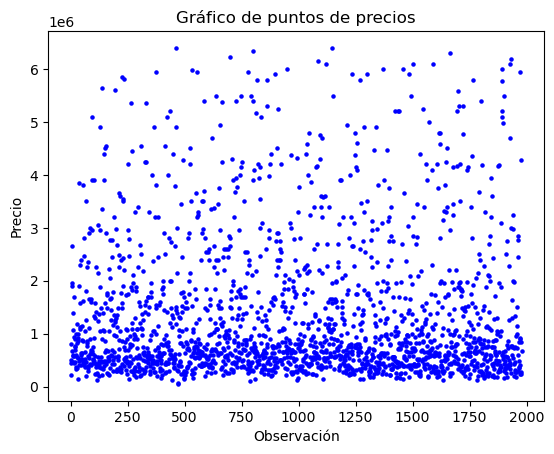

In [204]:
# Crear el gráfico de dispersión
plt.scatter(range(copydf.shape[0]), copydf['Price'], s=5, color='blue')

# Etiquetas de los ejes
plt.xlabel('Observación')  # Eje X
plt.ylabel('Precio')  # Eje Y
plt.title('Gráfico de puntos de precios')  # Título del gráfico

# Mostrar el gráfico
plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

In [214]:
# Tasa de cambio de Rupia india a pesos colombianos
tasa_cambio = 50  # Se establece la tasa de cambio de 1 dólar a 50 pesos colombianos

# Convertir precios a pesos colombianos
copydf['Price_CO'] = copydf['Price'] * tasa_cambio  # Se multiplica la columna 'Price' por la tasa de cambio para obtener el precio en pesos

# Redondear los precios a enteros
copydf['Price_CO'] = copydf['Price_CO'].round().astype(int)  # Se redondean los precios a la unidad más cercana y se convierten a tipo entero

# Mostrar el resumen del DataFrame sin los valores atípicos
copydf.info()  # Muestra un resumen del DataFrame, incluyendo el número de entradas, tipos de datos y uso de memoria


<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1979 non-null   object 
 1   Model               1979 non-null   object 
 2   Price               1979 non-null   int64  
 3   Year                1979 non-null   int64  
 4   Kilometer           1979 non-null   int64  
 5   Fuel Type           1979 non-null   object 
 6   Transmission        1979 non-null   object 
 7   Location            1979 non-null   object 
 8   Color               1979 non-null   object 
 9   Owner               1979 non-null   object 
 10  Seller Type         1979 non-null   object 
 11  Engine              1900 non-null   object 
 12  Max Power           1900 non-null   object 
 13  Max Torque          1900 non-null   object 
 14  Drivetrain          1844 non-null   object 
 15  Length              1916 non-null   float64
 16  Width      

In [181]:
# Mostrar las primeras filas del DataFrame
codf.head()  # Esto mostrará las primeras 5 filas del DataFrame

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Price_CO
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,25250000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,22500000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,11000000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,39950000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,97500000


In [215]:
# variable indepemdiente X 
X = copydf[['Year']]

# variable dependiente y
y = copydf['Price_CO']

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [220]:
# Dividir el dataset en un 80% para entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las primeras filas del conjunto de entrenamiento
print("Conjunto de entrenamiento (X_train):")
print(X_train.head())  # Muestra las primeras filas del DataFrame de características de entrenamiento

print("\nValores objetivo del conjunto de entrenamiento (y_train):")
print(y_train.head())  # Muestra las primeras filas del array de valores objetivo de entrenamiento

# Mostrar las primeras filas del conjunto de prueba
print("\nConjunto de prueba (X_test):")
print(X_test.head())  # Muestra las primeras filas del DataFrame de características de prueba

print("\nValores objetivo del conjunto de prueba (y_test):")
print(y_test.head())  # Muestra las primeras filas del array de valores objetivo de prueba

Conjunto de entrenamiento (X_train):
      Year
201   2009
956   2019
659   2018
342   2017
1401  2014

Valores objetivo del conjunto de entrenamiento (y_train):
201      14750000
956      25499950
659     132500000
342     212500000
1401     12500000
Name: Price_CO, dtype: int32

Conjunto de prueba (X_test):
      Year
593   2017
100   2012
1098  2018
1750  2016
1569  2014

Valores objetivo del conjunto de prueba (y_test):
593     33750000
100     24650000
1098    44950000
1750    30000000
1569    21749950
Name: Price_CO, dtype: int32


# 5. Entrenar el modelo configurando los diferentes hiperparametro 

In [223]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [224]:
# coeficientes de regresion lineal
beta_0 = modelo.intercept_
beta_1 = modelo.coef_

# Muestra los coeficientes de regresion lineal
print(f"Intercepto (b0): {beta_0}")
print(f"Coeficiente (b1): {beta_1}")

Intercepto (b0): -13930761723.403093
Coeficiente (b1): [6942692.19796559]


In [229]:
# Calcular las métricas de evaluación del modelo
r2 = r2_score(y_test, y_pred)  # Calcular el coeficiente de determinación R^2 para medir la proporción de la varianza en los datos que es predecible por el modelo
mae = mean_absolute_error(y_test, y_pred)  # Calcular el error absoluto medio (MAE), que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales
mse = mean_squared_error(y_test, y_pred)  # Calcular el error cuadrático medio (MSE), que mide el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales
rmse = np.sqrt(mse)  # Calcular la raíz cuadrada del MSE para obtener el RMSE, que tiene las mismas unidades que la variable objetivo

# Mostrar las métricas
print(f'R^2 (Coeficiente de determinación): {r2}')  # Imprimir el R^2, que indica el porcentaje de varianza en la variable dependiente explicada por el modelo
print(f'Error Absoluto Medio (MAE): {mae}')  # Imprimir el MAE, que indica el margen de error promedio en las predicciones
print(f'Error Cuadrático Medio (MSE): {mse}')  # Imprimir el MSE, que proporciona una medida de error más penalizada para errores grandes
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')  # Imprimir el RMSE, que es útil para interpretar el error en las mismas unidades que la variable objetivo

R^2 (Coeficiente de determinación): 0.1550834304969283
Error Absoluto Medio (MAE): 46173622.79804576
Error Cuadrático Medio (MSE): 3740102418855304.0
Raíz del Error Cuadrático Medio (RMSE): 61156376.76363197


# 7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.

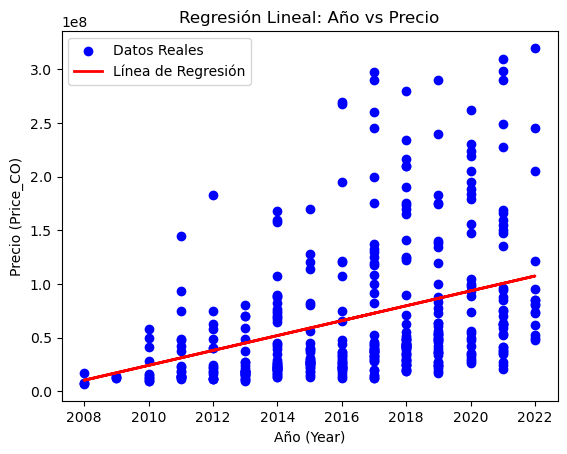

In [226]:
# Gráfico de dispersión de los datos reales
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')

# Gráfico de la línea de regresión (predicciones)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('Año (Year)')
plt.ylabel('Precio (Price_CO)')
plt.title('Regresión Lineal: Año vs Precio')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.show()

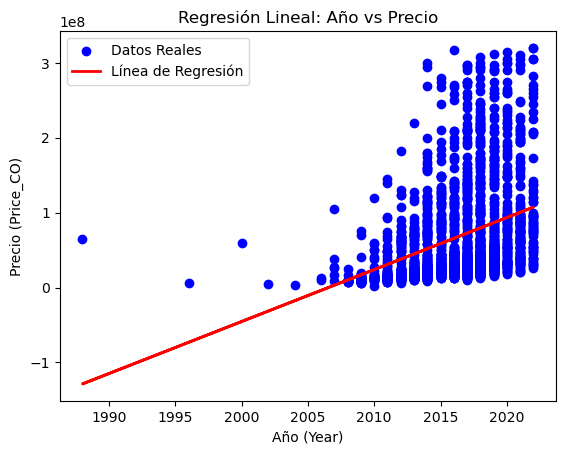

In [193]:
# Gráfico de dispersión de los datos reales
plt.scatter(copydf['Year'], y, color='blue', label='Datos Reales')

# Gráfico de la línea de regresión (predicciones)
plt.plot(copydf['Year'], modelo.predict(X), color='red', linewidth=2, label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('Año (Year)')
plt.ylabel('Precio (Price_CO)')
plt.title('Regresión Lineal: Año vs Precio')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.show()

In [163]:
nuevos_anios = pd.DataFrame({'Year': [2025, 2026, 2027, 2028, 2029]})

# Hacer nuevas predicciones utilizando el modelo
nuevas_predicciones = modelo.predict(nuevos_anios)

# Mostrar las nuevas predicciones
for anio, prediccion in zip(nuevos_anios['Year'], nuevas_predicciones):
    print(f'Predicción para el año {anio} es de: {prediccion} pesos_CO')

Predicción para el año 2025 es de: 128189977.47721672 pesos_CO
Predicción para el año 2026 es de: 135132669.67518234 pesos_CO
Predicción para el año 2027 es de: 142075361.87314796 pesos_CO
Predicción para el año 2028 es de: 149018054.0711136 pesos_CO
Predicción para el año 2029 es de: 155960746.2690792 pesos_CO


# 8. Otros Análisis de datos multivariables 

In [234]:
# variable indepemdiente X 
X = copydf[['Year', 'Kilometer']]

# variable dependiente y
y = copydf['Price_CO']

# Dividir el dataset en un 80% para entrenamiento y 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [232]:
# coeficientes de regresion lineal
beta_0 = modelo.intercept_
beta_1, beta_2 = modelo.coef_

# Muestra los coeficientes de regresion lineal
print(f"Intercepto (b0): {beta_0}")
print(f"Coeficiente (b1): {beta_1}")
print(f"Coeficiente (b2): {beta_2}")

Intercepto (b0): -13630118820.884003
Coeficiente (b1): 6794450.94228283
Coeficiente (b2): -31.01180514191146


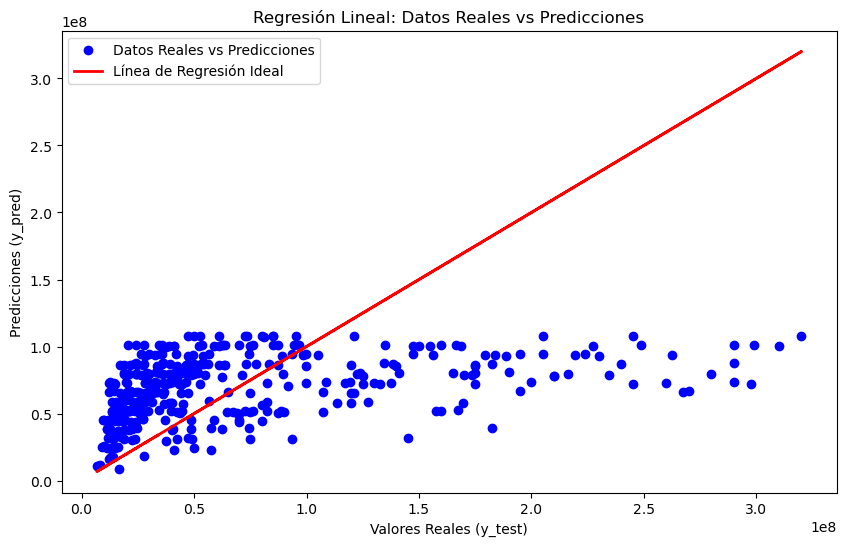

In [233]:
# Gráfico de dispersión de los datos reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos Reales vs Predicciones')

# Gráfico de la línea de regresión (predicciones)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Línea de Regresión Ideal')

# Etiquetas y título
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Regresión Lineal: Datos Reales vs Predicciones')

# Mostrar leyenda
plt.legend()

# Mostrar gráfica
plt.show()

In [196]:
nuevos_datos = pd.DataFrame({
    'Year': [2021, 2022, 2023],  # Años
    'Kilometer': [15000, 25000, 30000]  # Kilómetros
})

# Realizar predicciones utilizando el modelo ajustado
nuevas_predicciones = modelo.predict(nuevos_datos)

# Mostrar las nuevas predicciones
predicciones_df = pd.DataFrame({
    'Year': nuevos_datos['Year'],
    'Kilometer': nuevos_datos['Kilometer'],
    'Price_CO_Predicted': nuevas_predicciones
})

print(predicciones_df)

   Year  Kilometer  Price_CO_Predicted
0  2021      15000        1.010014e+08
1  2022      25000        1.074857e+08
2  2023      30000        1.141251e+08


# 9. Interpretar, analizar y documentar los resultados obtenidos. 

## interpretación de resultados

En el análisis de datos se encontraron algunos datos como valores atípicos los cuales no fueron tenidos en cuenta en la muestra tapara el entrenamiento del algoritmo para tener un mejor entrenamiento del modelo, se redujo el número de datos iniciales de 2059 muestras a 1979. 
También fue necesario hacer una transformación de la unidad de precio ya que se inicialmente estaba representada en moneda RUPIA INDIA y se pasa pesos_CO. 
Luego de realizar el entrenamiento utilizando como variable independiente Year y variable dependiente Prince obtenemos los siguientes datos:

Intercepto (b0): -13930761723.403093: 
Este valor hace parte de la fórmula de la ecuación lineal y nos indica el valor que toma la variable dependiente cuando la variable independiente es 0, es decir para este caso en el año 0 el precio del vehículo se predice en -13930761723 pesos

Coeficiente (b1): [6942692.19796559]:
este valor conocido como la pendiente nos indica cuanto cambia la variable dependiente cada vez que la variable independiente aumente una unidad, es decir, por cada año el valor del vehículo aumenta 6942692 pesos

R^2 (Coeficiente de determinación): 0.1550834304969283:
este valor indica el porcentaje de predicción correcta que han tenido el grupo de datos es decir solamente el 15.5% de los datos fueron predichos de manera correcta.

Error Absoluto Medio (MAE): 46173622.79804576: 
este valor nos indica el margen de diferencia que se tiene entre el valor estimado y el valor real, es decir, puede existir una diferencia de 46173622 pesos por encima o por debajo del valor predicho. 

Por lo anteriormente dicho se puede concluir que este modelo no es adecuado para predecir el valor del precio, ya que esta variable también puede tener una relación más fuete con otras características 

En otro escenario se realizar el entrenamiento utilizando tres variables como variables independientes Year - Kilometer y variable dependiente Prince obtenemos los siguientes datos:

Intercepto (b0): -13630118820.884003:
Este valor hace parte de la fórmula de la ecuación lineal y nos indica el valor que toma la variable dependiente cuando la variable independiente es 0, es decir para este caso en el año 0 el precio del vehículo se predice en -13630118820 pesos

Coeficiente (b1): 6794450.94228283:
este valor conocido como la pendiente nos indica cuanto cambia la variable dependiente cada vez que la variable independiente aumente una unidad, es decir, por cada año el valor del vehículo aumenta 6794450 pesos

Coeficiente (b2): -31.01180514191146:
este valor conocido como la pendiente nos indica cuanto cambia la variable dependiente cada vez que la variable independiente aumente una unidad, es decir, por cada kilómetro el valor del vehículo disminuye -31 pesos
